In [2]:
from pathlib import Path
from utils import parse_sf_results
import kachery_client as kc
import sortingview as sv
import matplotlib.pyplot as plt
import os


In [3]:
models_path = Path('models')
models_path.mkdir(exist_ok=True)

In [ ]:
# Load in the data from the sf url
khash = 'sha1://b3444629251cafda919af535f0e9837279151c6e/spikeforest-full-gt-qm.json?manifest=cf73c99d06c11e328e635e14dc24b8db7372db3d'
sf_data = kc.load_json(khash)

In [ ]:
available_studies = set([entry['studyName'] for entry in sf_data])

In [21]:
# Exclude paired, neurocube, neuronexus and mea_c30
studies_to_exclude = set([entry['studyName'] for entry in sf_data if 'paired' in entry['studyName']
                               or 'neuronexus' in entry['studyName'] or 'neurocube' in entry['studyName']] + ['mea_c30'])

In [22]:
filtered_studies = list(available_studies - studies_to_exclude)

In [29]:
khash = 'sha1://3848cc3165e6486181771651a5d933b75d14ba08/shuffle_8x_B_2B.json'
sf_data = kc.load_json(khash)

recording = sv.LabboxEphysRecordingExtractor(sf_data, download=False)

In [30]:
recording.get_channel_locations()

array([[ 16.,   0.],
       [ 48.,   0.],
       [ 16.,  20.],
       [ 48.,  20.],
       [ 16.,  40.],
       [ 48.,  40.],
       [ 16.,  60.],
       [ 48.,  60.],
       [ 16.,  80.],
       [ 48.,  80.],
       [ 16., 100.],
       [ 48., 100.],
       [ 16., 120.],
       [ 48., 120.],
       [ 16., 140.],
       [ 48., 140.],
       [ 16., 160.],
       [ 48., 160.],
       [ 16., 180.],
       [ 48., 180.],
       [ 16., 200.],
       [ 48., 200.],
       [ 16., 220.],
       [ 48., 220.],
       [ 16., 240.],
       [ 48., 240.],
       [ 16., 260.],
       [ 48., 260.],
       [ 16., 280.],
       [ 48., 280.],
       [ 16., 300.],
       [ 48., 300.],
       [ 16., 320.],
       [ 48., 320.],
       [ 16., 340.],
       [ 48., 340.],
       [ 16., 360.],
       [ 48., 360.],
       [ 16., 380.],
       [ 48., 380.],
       [ 16., 400.],
       [ 48., 400.],
       [ 16., 420.],
       [ 48., 420.],
       [ 16., 440.],
       [ 48., 440.],
       [ 16., 460.],
       [ 48.,

In [7]:
shuffle_bionet_recording = sv.LabboxEphysRecordingExtractor(kc.load_json('sha1://3848cc3165e6486181771651a5d933b75d14ba08/shuffle_8x_B_2B.json'), download=False)
static_bionet_recording = sv.LabboxEphysRecordingExtractor(kc.load_json('sha1://3848cc3165e6486181771651a5d933b75d14ba08/static_8x_B_2B.json'), download=False)
drift_bionet_recording = sv.LabboxEphysRecordingExtractor(kc.load_json('sha1://3848cc3165e6486181771651a5d933b75d14ba08/drift_8x_B_2B.json'), download=False)

hybrid_janelia_drift_siprobe = sv.LabboxEphysRecordingExtractor(kc.load_json('sha1://9e3f6a8ea55cbb718903bb45e750f22387f3e2e8/rec_16c_1200s_11.json'), download=False)

In [5]:
def plot_channel_locations(recording: sv.LabboxEphysRecordingExtractor, title=None, output=None):
    fig, ax = plt.subplots()
    x, y = zip(*list(recording.get_channel_locations()))
    ax.scatter(x, y)
    if title is not None:
        fig.suptitle(title)
    if output is not None:
        plt.savefig(output)


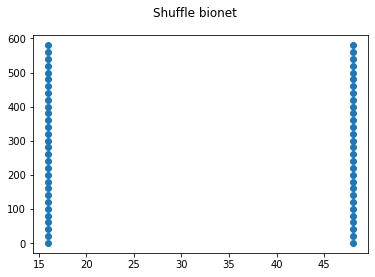

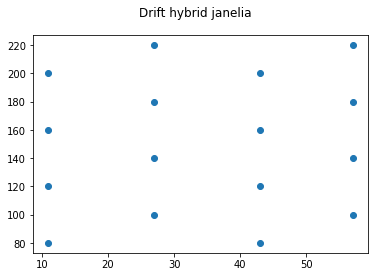

In [44]:
plot_channel_locations(shuffle_bionet_recording, title='Shuffle bionet', output='tasks/data_cleaning/bionet_probe_geometry.pdf')
plot_channel_locations(hybrid_janelia_drift_siprobe, title='Drift hybrid janelia', output='tasks/data_cleaning/hybrid_janelia_probe_geometry.pdf')

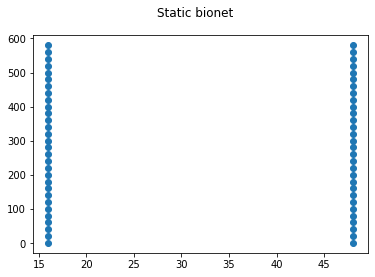

In [8]:
plot_channel_locations(static_bionet_recording, title='Static bionet')
